In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

data = pd.read_csv ('/content/winequality-red.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality num,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Bad


In [ ]:
classLabel="quality num"
data2 = data.drop(classLabel, axis = 1)

In [ ]:
ClassLabel="quality"
dataFeatures = data2.drop(ClassLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

In [ ]:
Features = data2.drop(ClassLabel,axis = 1)
features=list(Features.columns.values)
print(features)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
dataPhenotypes = data[ClassLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

In [ ]:
dataPhenotypes

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype=object)

In [ ]:
dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

In [ ]:
DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model=DecisionTreeClassifier()

In [ ]:
#Please see the following website for reference
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

import numpy as np


max_depth= [10,20,30,40,50]
max_depth.append(None)

min_samples_split = [2,3,4,5,6]

min_samples_leaf = [1,2,5]

max_features=[1,2,4,6,11]
max_features.append(None)




# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
print(random_grid)

{'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 5], 'max_features': [1, 2, 4, 6, 11, None]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_random= RandomizedSearchCV(estimator=model,param_distributions= random_grid, n_iter=100, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_random.fit(dataFeatures_train,dataPhenotypes_train)
model_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 40,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the random grid
param_grid = {
 'max_depth': [10,20,30,40,50],
 'min_samples_split': [2,3,4,5],
 'min_samples_leaf': [1,2,5],
 'max_features': [1,2,4,6]}
print(param_grid)

{'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 5], 'max_features': [1, 2, 4, 6]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_grid= GridSearchCV(estimator=model,param_grid= param_grid, cv = 3, verbose=2, n_jobs=-1)

In [ ]:
model_grid.fit(dataFeatures_train,dataPhenotypes_train)
model_grid.best_params_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=10,min_samples_split=2, min_samples_leaf=1, max_features=2)

TrainedModel=model.fit(dataFeatures_train,dataPhenotypes_train)

In [ ]:
#https://mljar.com/blog/extract-rules-decision-tree/

text_representation = tree.export_text(model,feature_names=features)
print(text_representation)

|--- alcohol <= 11.55
|   |--- free sulfur dioxide <= 24.50
|   |   |--- alcohol <= 10.45
|   |   |   |--- sulphates <= 0.69
|   |   |   |   |--- pH <= 3.00
|   |   |   |   |   |--- free sulfur dioxide <= 9.00
|   |   |   |   |   |   |--- class: Bad
|   |   |   |   |   |--- free sulfur dioxide >  9.00
|   |   |   |   |   |   |--- class: Good
|   |   |   |   |--- pH >  3.00
|   |   |   |   |   |--- chlorides <= 0.08
|   |   |   |   |   |   |--- citric acid <= 0.02
|   |   |   |   |   |   |   |--- fixed acidity <= 7.20
|   |   |   |   |   |   |   |   |--- class: Bad
|   |   |   |   |   |   |   |--- fixed acidity >  7.20
|   |   |   |   |   |   |   |   |--- volatile acidity <= 0.66
|   |   |   |   |   |   |   |   |   |--- pH <= 3.34
|   |   |   |   |   |   |   |   |   |   |--- class: Bad
|   |   |   |   |   |   |   |   |   |--- pH >  3.34
|   |   |   |   |   |   |   |   |   |   |--- class: Bad
|   |   |   |   |   |   |   |   |--- volatile acidity >  0.66
|   |   |   |   |   |   |   |   | 

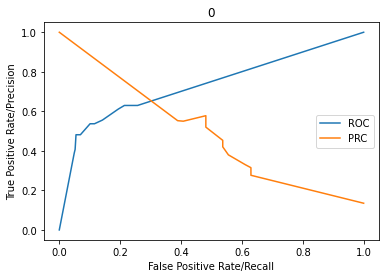

PRC AUC:0.4901937791126435
ROC AUC:0.7325251552130165


<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = TrainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataPhenotypes_test, probs[:,1])
prec1, recall1, thresholds1 = precision_recall_curve(DataPhenotypes_test, probs[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()
plt.savefig("Vgg19CNNClass0.png")

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

In [ ]:
probs

array([[0.78933456, 0.21066544],
       [0.94290687, 0.05709313],
       [0.93223447, 0.06776553],
       ...,
       [0.89818655, 0.10181345],
       [0.76771004, 0.23228996],
       [0.94107418, 0.05892582]])

In [ ]:
DataPhenotypes_test[:,0]

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
DataPhenotypes_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
probs[:,0]

array([0.78933456, 0.94290687, 0.93223447, ..., 0.89818655, 0.76771004,
       0.94107418])